# Declaration of Originality

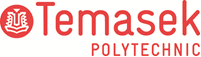

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : NG FENG KANG MALCOLM (2401779J)
* Tutorial Group                :  TC16
* Tutor						    :  MR EMILE SEBESTIAN
* Submission Date               : TBC


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
# Import necessary libraries for data analysis and visualization. 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Business Understanding

Mental health issues such as depression are getting increasingly common among students and can negatively affect their academic performance, social relationships, and overall well-being. However, many students who are experiencing mental health issues are not identified early enough to receive appropriate support. Without support for their mental health, dangerous issues may arise. 

The purpose of this data science project is to analyze students’ mental health through survey data to understand the prevalence and severity of depression and anxiety among students and to identify factors that may be associated with higher mental health risk.
Specifically, this project aims to:

1. Determine the distribution of depression (PHQ-9) among students, explore relationships between mental health scores and student-related factors such as academic workload, sleep patterns, and demographics as well as support early identification of students who may be at moderate to severe mental health risk. 

2. The insights gained from this analysis can help educational institutions and counselors design targeted mental health interventions, allocate support resources effectively, and promote student well-being by predicting the depression scores of students.


# 2. Data Understanding

## 2.1 Load dataset

In [ ]:
df = pd.read_csv('students_mental_health_survey.csv')
df

#### Comments (2.1): 
I loaded the dataset containing the survey responses related to student's mental health. As seen from the dataset, there are 7022 rows and 18 columns. 

## 2.2 Summary Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           7022 non-null   int64  
 1   Age                          7022 non-null   int64  
 2   Course                       7022 non-null   object 
 3   Gender                       7022 non-null   object 
 4   CGPA                         7010 non-null   float64
 5   Stress_Level                 7022 non-null   int64  
 6   Depression_Score             7022 non-null   int64  
 7   Anxiety_Score                7022 non-null   int64  
 8   Sleep_Quality                7022 non-null   object 
 9   Physical_Activity            7022 non-null   object 
 10  Diet_Quality                 7022 non-null   object 
 11  Social_Support               7022 non-null   object 
 12  Relationship_Status          7022 non-null   object 
 13  Substance_Use     

#### Comments: 
For df.info(), this is used to get information of the DataFrame including data types and non-null counts. As seen from the statistics, there are datatypes (floats, integers & objects). 

In [4]:
# Get summary statistics and data distribution for all columns in the dataset based on mean, median, mode, standard deviation, minimum, maximum, and percentiles.
df.describe(include='all')


,ID,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,...,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
count,7022.000000,7022.000000,7022,7022,7010.00000,7022.000000,7022.000000,7022.000000,7022,7022,...,7022,7022,7007,7022,7022,7022,7022.000000,7022,7022.000000,7022
unique,NaN,NaN,6,2,NaN,NaN,NaN,NaN,3,3,...,3,3,3,3,2,2,NaN,3,NaN,3
top,NaN,NaN,Medical,Male,NaN,NaN,NaN,NaN,Good,Moderate,...,Moderate,Single,Never,Never,No,No,NaN,Moderate,NaN,On-Campus
freq,NaN,NaN,2105,3547,NaN,NaN,NaN,NaN,3589,3521,...,3470,3574,5903,4263,4866,6678,NaN,3440,NaN,2815
mean,3511.500000,23.003418,NaN,NaN,3.49127,2.427941,2.254486,2.300484,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.453005,NaN,22.010538,NaN
std,2027.221128,3.853978,NaN,NaN,0.28742,1.638408,1.625193,1.624305,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.708995,NaN,4.358380,NaN
min,1.000000,18.000000,NaN,NaN,2.44000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,15.000000,NaN
25%,1756.250000,20.000000,NaN,NaN,3.29000,1.000000,1.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,18.000000,NaN
50%,3511.500000,22.000000,NaN,NaN,3.50000,2.000000,2.000000,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,22.000000,NaN
75%,5266.750000,25.000000,NaN,NaN,3.70000,4.000000,3.000000,4.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,26.000000,NaN


In [5]:
## Used to understand the different data type for each column
df.dtypes 

ID                               int64
Age                              int64
Course                          object
Gender                          object
CGPA                           float64
Stress_Level                     int64
Depression_Score                 int64
Anxiety_Score                    int64
Sleep_Quality                   object
Physical_Activity               object
Diet_Quality                    object
Social_Support                  object
Relationship_Status             object
Substance_Use                   object
Counseling_Service_Use          object
Family_History                  object
Chronic_Illness                 object
Financial_Stress                 int64
Extracurricular_Involvement     object
Semester_Credit_Load             int64
Residence_Type                  object
dtype: object

In [ ]:
## Used to check for missing values in each column. 
df.isna().sum()

ID                              0
Age                             0
Course                          0
Gender                          0
CGPA                           12
Stress_Level                    0
Depression_Score                0
Anxiety_Score                   0
Sleep_Quality                   0
Physical_Activity               0
Diet_Quality                    0
Social_Support                  0
Relationship_Status             0
Substance_Use                  15
Counseling_Service_Use          0
Family_History                  0
Chronic_Illness                 0
Financial_Stress                0
Extracurricular_Involvement     0
Semester_Credit_Load            0
Residence_Type                  0
dtype: int64

There are missing values for CGPA & Substance Use 

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

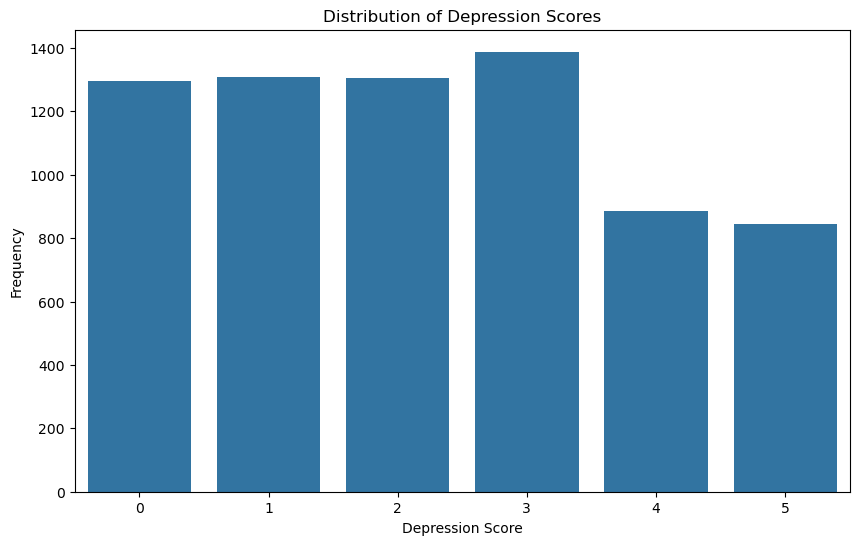

In [ ]:
## Understanding distribution of target
col_y = 'Depression_Score' # This is the target variable, depression score.
plt.figure(figsize=(10, 6))
sns.barplot(x=df[col_y].value_counts().index, y=df[col_y].value_counts().values)
plt.title('Distribution of Depression Scores')
plt.xlabel('Depression Score')
plt.ylabel('Frequency')
plt.show()

### 2.3.1.2 Understanding distribution of features

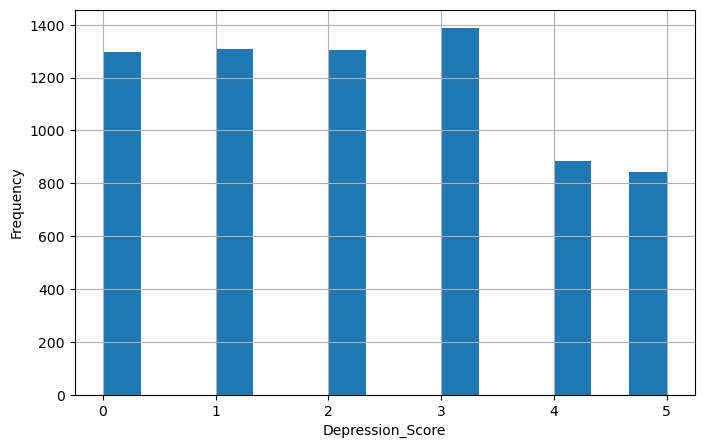

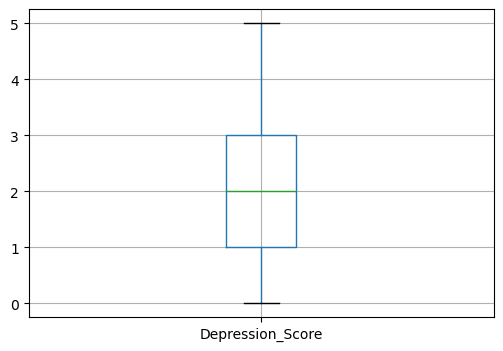

In [ ]:
## Understanding distribution of features
df.hist(figsize=(12,12))
df[col_y].boxplot(column= col_y, figsize=(12,12))
plt.show()

### 2.3.2 Understanding relationship between variables

In [9]:
## Understanding relationship between variables


# 3. Data Preparation

## 3.1 Data Cleaning

In [10]:
## Clean data

## 3.2 Train-Test Split

In [11]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [12]:
## Initialise and train model


# 5. Model Evaluation

In [13]:
## Evaluate model


In [14]:
## New data

## Predict


## Iterative model development


In [15]:
## Further feature engineering / feature selection